In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
radius = 5
outer_radius = 10
resolution = 10
length = 1

In [32]:
def topdown():
    spaces = np.linspace(0, 2*np.pi, resolution)
    x = radius * np.sin(spaces)
    y = radius * np.cos(spaces)
    
    directions = []
    for x_, y_ in zip(x, y):
        directions.append(np.array([[x_], [y_]]))    
        
    points = []
    virt_coords = []
    max_k = outer_radius / radius
    ks = np.linspace(1, max_k, resolution)
    for direction in directions:
        for k in ks:
            point = direction * k
            points.append(point.tolist())
            
            virt_coords.append(np.sqrt(np.square(direction * (k-1)).sum()).tolist())

    points_x, points_y = list(zip(*points))
    points_x = list(map(lambda x_: x_[0], points_x))
    points_y = list(map(lambda y_: y_[0], points_y))
    
    return points_x, points_y, virt_coords

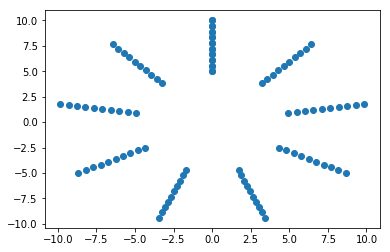

In [33]:
x, y, virt_coords = topdown()
plt.scatter(x, y)
plt.show()

In [34]:
def pos_height():
    return (length*np.sqrt(virt_coords)).tolist()
def neg_height():
    return (-length*np.sqrt(virt_coords)).tolist()

In [35]:
pos_height_points = pos_height()
neg_height_points = neg_height()

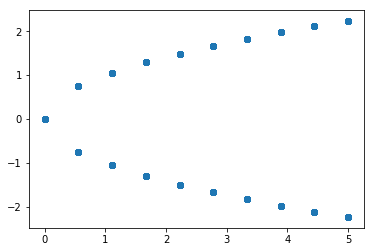

In [36]:
plt.scatter(virt_coords * 2, pos_height_points + neg_height_points)
plt.show()

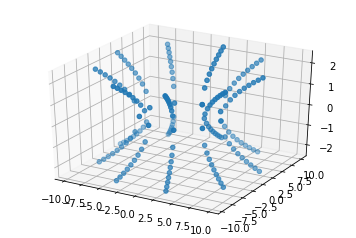

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x * 2, y * 2, pos_height_points + neg_height_points)
plt.show()